### 4 Corner Foresight Plot

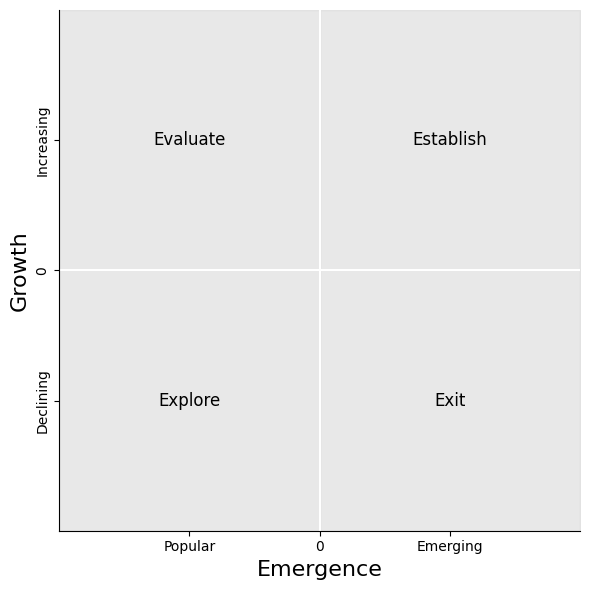

In [1]:
import matplotlib.pyplot as plt

# Create figure and axis
fig, ax = plt.subplots(figsize=(6, 6))

# Set axis limits
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

# Add grid lines for quadrants
ax.axhline(0.5, color='white', linewidth=1.5)  # Horizontal line
ax.axvline(0.5, color='white', linewidth=1.5)  # Vertical line

# Add shaded areas for quadrants
ax.fill_betweenx([0, 1], 0, 0.5, color='lightgray', alpha=0.5)  # Left half
ax.fill_betweenx([0, 1], 0.5, 1, color='lightgray', alpha=0.5)  # Right half

# Add quadrant labels
ax.text(0.25, 0.75, "Evaluate", ha='center', va='center', fontsize=12)
ax.text(0.75, 0.75, "Establish", ha='center', va='center', fontsize=12)
ax.text(0.25, 0.25, "Explore", ha='center', va='center', fontsize=12)
ax.text(0.75, 0.25, "Exit", ha='center', va='center', fontsize=12)

# Set axis labels
ax.set_xlabel("Emergence", fontsize=16)
ax.set_ylabel("Growth", fontsize=16)

# Set axis ticks
ax.set_xticks([0.25, 0.5, 0.75])
ax.set_yticks([0.25, 0.5, 0.75])
ax.set_xticklabels(["Popular","0", "Emerging"])
ax.set_yticklabels(["Declining", "0", "Increasing"], rotation=90, ha='right', va='center')

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show plot
plt.tight_layout()
plt.show()


### Dataset information

In [4]:
import pandas as pd

# Circular economy data
df_ce = pd.read_pickle('Data_copy/corpus.pkl')

# Psychology data
df_ps = pd.read_pickle('Data_Psych/corpus.pkl')

# Nature data
df_nat = pd.read_pickle('Data_Nature/corpus.pkl')

In [6]:
from src.data_preprocessing import split_in_time_points
import numpy as np

# Circular Economy
print('Circular Economy Data:')

# Date information
min_date = df_ce['coverDate'].min()
max_date = df_ce['coverDate'].max()
print(f'The earliest date in the corpus is {min_date} and the latest is {max_date}')

# Number of documents
D = len(df_ce)
print(f'Total number of documents D: {D}')

# Extract the year from the datetime column
dfs_ce = split_in_time_points(df_ce)
T = len(dfs_ce)
D_t_list = []
for t in range(1, T+1):
    D_t = len(dfs_ce[t])
    D_t_list.append(D_t)

avg_D_t = np.average(D_t_list)
print(f'The average number of documents at t: {avg_D_t}')


[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /home/phagen/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /home/phagen/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /home/phagen/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /home/phagen/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /home/phagen/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /home/phagen/nltk_data...
[nltk_data]    

Circular Economy Data:
The earliest date in the corpus is 2017-01-01 and the latest is 2023-12-01
Total number of documents D: 80075
Result: number of dataframes/ calculated years/ t: 7
The average number of documents at t: 11439.285714285714


In [7]:
# Psychology Data
print('Psychology Data:')

# Date information
min_date = df_ps['coverDate'].min()
max_date = df_ps['coverDate'].max()
print(f'The earliest date in the corpus is {min_date} and the latest is {max_date}')

# Number of documents
D = len(df_ps)
print(f'Total number of documents D: {D}')

# Extract the year from the datetime column
dfs_ps = split_in_time_points(df_ps)
T = len(dfs_ps)
D_t_list = []
for t in range(1, T+1):
    D_t = len(dfs_ps[t])
    D_t_list.append(D_t)

avg_D_t = np.average(D_t_list)
print(f'The average number of documents at t: {avg_D_t}')

Psychology Data:
The earliest date in the corpus is 2005-01-01 00:00:00 and the latest is 2024-10-01 00:00:00
Total number of documents D: 3530
Result: number of dataframes/ calculated years/ t: 20
The average number of documents at t: 176.5


In [8]:
# Nature Data
print('Nature Data:')

# Date information
min_date = df_nat['coverDate'].min()
max_date = df_nat['coverDate'].max()
print(f'The earliest date in the corpus is {min_date} and the latest is {max_date}')

# Number of documents
D = len(df_nat)
print(f'Total number of documents D: {D}')

# Extract the year from the datetime column
dfs_nat = split_in_time_points(df_nat)
T = len(dfs_nat)
D_t_list = []
for t in range(1, T+1):
    D_t = len(dfs_nat[t])
    D_t_list.append(D_t)

avg_D_t = np.average(D_t_list)
print(f'The average number of documents at t: {avg_D_t}')

Nature Data:
The earliest date in the corpus is 2005-04-07 00:00:00 and the latest is 2024-11-07 00:00:00
Total number of documents D: 24457
Result: number of dataframes/ calculated years/ t: 20
The average number of documents at t: 1222.85


### k-range as a function of number of documents 

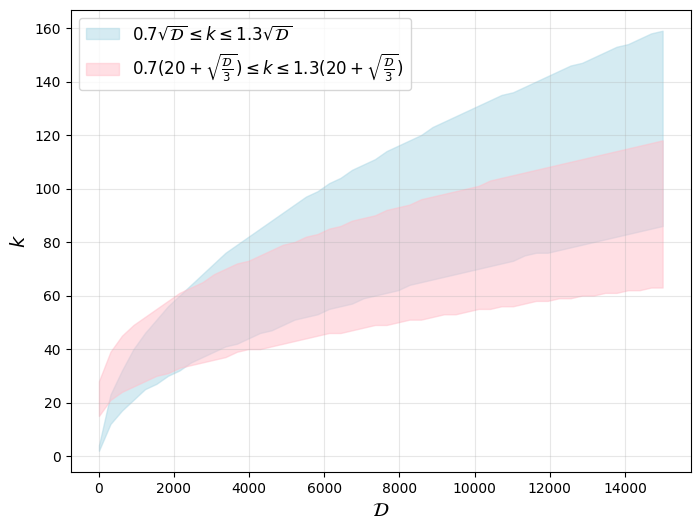

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define the functions
def lower_k_mügro(x):
    medium_k = np.sqrt(x)
    return np.round(0.7 * medium_k)

def upper_k_mügro(x):
    medium_k = np.sqrt(x)
    return np.round(1.3 * medium_k)

def lower_k_own(x):
    medium_k = 20 + np.sqrt(x / 3)
    return np.round(0.7 * medium_k)

def upper_k_own(x):
    medium_k = 20 + np.sqrt(x / 3)
    return np.round(1.3 * medium_k)

# Define the x-axis values
x = np.linspace(10, 15000)

# Compute y-values
y1 = lower_k_mügro(x)
y2 = upper_k_mügro(x)
y3 = lower_k_own(x)
y4 = upper_k_own(x)

# Create the plot
plt.figure(figsize=(8, 6))

# Add shading for the ranges
plt.fill_between(x, y1, y2, color="#add8e6", alpha=0.5, label=r"$0.7 \sqrt{\mathcal{D}} \leq k \leq 1.3 \sqrt{\mathcal{D}}$")
plt.fill_between(x, y3, y4, color="pink", alpha=0.5, label=r"$0.7 (20 + \sqrt{\frac{\mathcal{D}}{3}}) \leq k \leq 1.3 (20 + \sqrt{\frac{\mathcal{D}}{3}})$")

# Add labels and legend
plt.xlabel(r"$\mathcal{D}$", fontsize=14)
plt.ylabel(r"$k$", fontsize=14)
plt.legend(fontsize=12)

# Customize grid and appearance
plt.grid(alpha=0.3)

# Save the plot as a PNG file
plt.savefig('graphs/graph_k_ranges.png', dpi=300)

# Show the plot
plt.show()


### Point plot of similarity values from emergence detection 

In [13]:
# Get first two model outputs
from octis.models import model
import pickle
model1_output = model.load_model_output(('models/model1.npz'), top_words = 10)
with open('models/model1.pkl', 'rb') as f:
    model1 = pickle.load(f)
model2_output = model.load_model_output(('models/model2.npz'), top_words = 10)
with open('models/model2.pkl', 'rb') as f:
    model2 = pickle.load(f)

# Calculate similarity matrix
from src.topic_analysis import calculate_similarities
similarity_matrix = calculate_similarities(model_new = model2, model_output_new = model2_output, model_old = model1, model_output_old = model1_output)

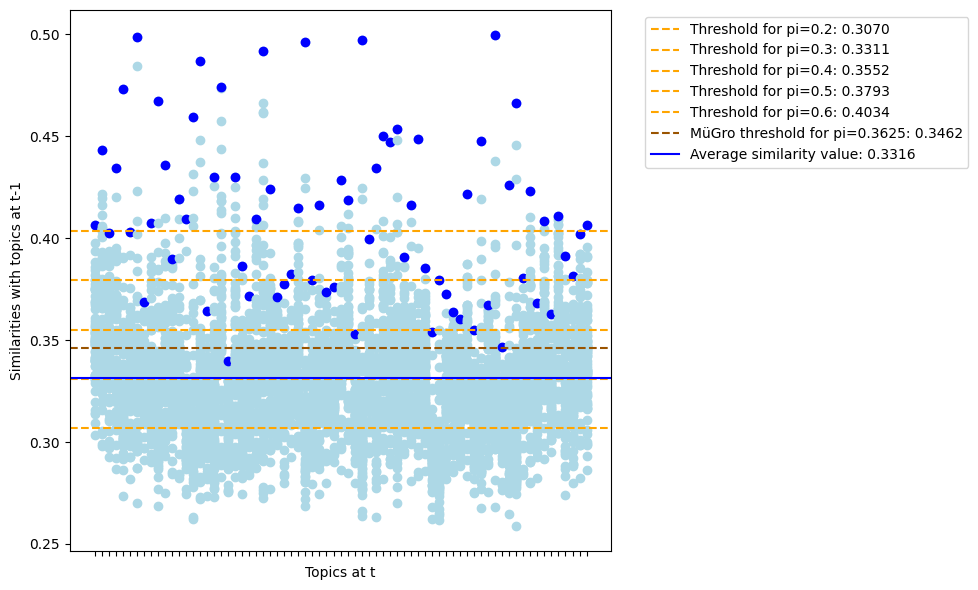

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Example numpy array
# Replace this with your actual data
similarities = np.array([ 
    [0.2, 0.3, 0.5, 0.3, 0.2, 0.4, 0.3, 0.5],
    [0.6, 0.7, 0.8, 0.9, 0.01, 0.001, 0.4, 0.6],
    [0.4, 0.5, 0.6, 0.3, 0.1, 0.3, 0.1, 0.7]
])

# Calculate sim_min, sim_max and sim_avg
sim_min = similarity_matrix.min()
sim_max = similarity_matrix.max()
sim_avg = np.average(similarity_matrix)

# Cut-off values
pi_values = [0.2, 0.3, 0.4, 0.5, 0.6]
thresholds = [sim_min + pi * (sim_max - sim_min) for pi in pi_values]
mügro_threshold = sim_min + 0.3625 * (sim_max - sim_min)

# Topics for x-axis labels
topics = [(i+1) for i in range(similarity_matrix.shape[0])]

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data points and highlight maximum value per row in blue
for i, row in enumerate(similarity_matrix):
    # Find the index of the maximum value in this row
    max_index = np.argmax(row)
    
    # Plot all points with light blue color
    ax.scatter([topics[i]] * len(row), row, color="#add8e6")
    
    # Highlight the maximum value in blue
    ax.scatter(topics[i], row[max_index], color="blue")

# Add horizontal lines for cut-off values
for i, threshold in enumerate(thresholds):
    ax.axhline(y=threshold, color='orange', linestyle='--', label=f'Threshold for pi={pi_values[i]}: {threshold:.4f}')
ax.axhline(y=mügro_threshold, color='#9a5400', linestyle='--', label=f'MüGro threshold for pi=0.3625: {mügro_threshold:.4f}')

# Add average similarity
ax.axhline(y=sim_avg, color="blue", linestyle='-', label=f'Average similarity value: {sim_avg:.4f}')

# Customize plot
ax.set_xlabel('Topics at t')
ax.set_ylabel('Similarities with topics at t-1')
#ax.set_title('Point Plot with Cut-off Lines')
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=45)

# Hide x-values (topic names)
ax.set_xticks(topics)
ax.set_xticklabels([])

# Save the plot as a PNG file
plt.tight_layout()
plt.savefig('graphs/scatter_plot_similarities.png', dpi=300)

# Show plot
plt.show()